# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [12]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(
            Image.fromarray(data[0,:].reshape((28,28))).resize(size)
        ))
        
        
        .flatten()
        resized_data[i,:] = d
    return resized_data    

In [14]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [15]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

In [40]:
data_train[0].reshape(data_train[0].shape[0],1).shape

(784, 1)

In [39]:
a = data_train[0].shape

(784,)

In [41]:
resize_images(a, (20, 20))

IndexError: too many indices for array

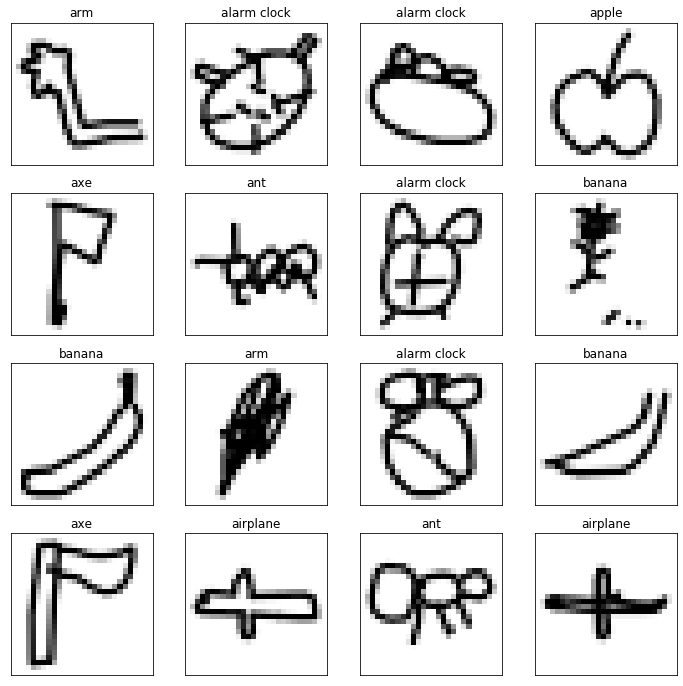

In [9]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [10]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [11]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
# model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
100000/100000 [==============================] - 14s 142us/step - loss: 10.3805 - accuracy: 0.3547
Epoch 2/500
100000/100000 [==============================] - 13s 133us/step - loss: 9.2519 - accuracy: 0.4253
Epoch 3/500
100000/100000 [==============================] - 15s 146us/step - loss: 9.1371 - accuracy: 0.4325
Epoch 4/500
100000/100000 [==============================] - 13s 131us/step - loss: 9.0935 - accuracy: 0.4354
Epoch 5/500
100000/100000 [==============================] - 16s 157us/step - loss: 9.0175 - accuracy: 0.4400
Epoch 6/500
100000/100000 [==============================] - 16s 156us/step - loss: 8.9856 - accuracy: 0.4420
Epoch 7/500
100000/100000 [==============================] - 15s 150us/step - loss: 8.2014 - accuracy: 0.4904s - loss: 8.214
Epoch 8/500
100000/100000 [==============================] - 17s 167us/step - loss: 7.8369 - a

100000/100000 [==============================] - 36s 365us/step - loss: 7.1716 - accuracy: 0.5548
Epoch 141/500
100000/100000 [==============================] - 17s 169us/step - loss: 7.1678 - accuracy: 0.5551
Epoch 142/500
100000/100000 [==============================] - 16s 164us/step - loss: 7.1522 - accuracy: 0.5561
Epoch 143/500
100000/100000 [==============================] - 15s 149us/step - loss: 7.1694 - accuracy: 0.5551
Epoch 144/500
100000/100000 [==============================] - 25s 254us/step - loss: 7.1621 - accuracy: 0.5555
Epoch 145/500
100000/100000 [==============================] - 17s 168us/step - loss: 7.1638 - accuracy: 0.5554
Epoch 146/500
100000/100000 [==============================] - 12s 116us/step - loss: 7.1452 - accuracy: 0.5565
Epoch 147/500
100000/100000 [==============================] - 11s 110us/step - loss: 7.1580 - accuracy: 0.5557
Epoch 148/500
100000/100000 [==============================] - 11s 107us/step - loss: 7.1369 - accuracy: 0.5571
Epoch 

KeyboardInterrupt: 

In [ ]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')